In [1]:
import librosa
import numpy as np
import IPython
import pandas as pd

#importing librarys

In [2]:
import os
cwd = os.getcwd()
print(cwd)
os.chdir('/Users/zeyuanli/Dropbox/Github/Librosa test'+'/AudioWAV')
#change the directory to AudioMP3

/Users/zeyuanli/Dropbox/Github/Librosa test


In [3]:
import warnings
warnings.filterwarnings("ignore")

#ignoring import warnings

In [4]:
#IPython.display.Audio(loaded['signals'][1],rate = 22050)

In [5]:
#IPython.display.Audio(train[1],rate = 22050)

In [6]:
#load training data from .npz files
traindata = np.zeros((1,110250))
for i in os.listdir():
    if (i.startswith('train') and i.endswith('.npz')):
        loaded = np.load(i)['signals']
        traindata= np.concatenate((loaded,traindata), axis = 0)

In [7]:
train = traindata[1:,:]

In [8]:
#load testing datas from .npz files
testdata = np.zeros((1,110250))
for i in os.listdir():
    if (i.startswith('test') and i.endswith('.npz')):
        loaded = np.load(i)['signals']
        testdata= np.concatenate((loaded,testdata), axis = 0)
test = testdata[2:,:]

In [9]:
train.shape

(5210, 110250)

In [10]:
train

array([[ 1.27123451e-04,  9.68814420e-05,  2.25798372e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.35887920e-03,  3.13806743e-03,  3.03717167e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.31464300e-03, -2.26339907e-03, -2.61652656e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 9.01850872e-03,  1.07820174e-02,  9.61892400e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.13257187e-04, -1.67434220e-03, -2.09365902e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [11]:
X_i = train - X_mean

In [12]:
X_i_test = test - X_mean

In [45]:
test.shape

(2231, 110250)

In [14]:
import jax.scipy as jax

In [15]:
U,D,V = jax.linalg.svd(X_i,
                                  full_matrices=False,
                                  compute_uv=True,
                                  check_finite=False,
                                  overwrite_a=True
                                 )

In [17]:
print(U.shape)
print(D.shape)
print(V.shape)

(5209, 5209)
(5209,)
(5209, 110250)


In [20]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score #computes F1 score
from sklearn.metrics import accuracy_score #compute accuracy

In [23]:
target = pd.read_csv ("Target.csv")

In [25]:
print(target)
print(train.shape)

     Emotion
0        SAD
1        SAD
2        FEA
3        HAP
4        ANG
...      ...
7437     FEA
7438     NEU
7439     FEA
7440     HAP
7441     HAP

[7442 rows x 1 columns]
(5209, 110250)


In [46]:
logreg = LogisticRegression(penalty='l2',max_iter=10000, multi_class = "ovr")
logreg.fit(train,target[:5210])
pred = logreg.predict(train)
pred_test = logreg.predict(test)

In [48]:
accuracy_score(target[-2231:], pred_test)

0.1555356342447333

In [36]:
pred_test.shape

(2231,)

In [39]:
test.shape[0]+train.shape[0]

7440

In [50]:
from matplotlib import pylab as plt

In [84]:
category = target[:5210].astype("category")

In [85]:
array = np.array(category)

(array([897., 892., 869., 897., 750., 905.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <BarContainer object of 6 artists>)

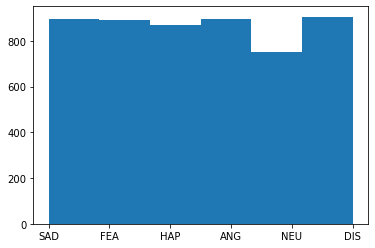

In [86]:
plt.hist(array.flatten(), bins = 6)

(array([374., 402., 379., 374., 366., 337.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <BarContainer object of 6 artists>)

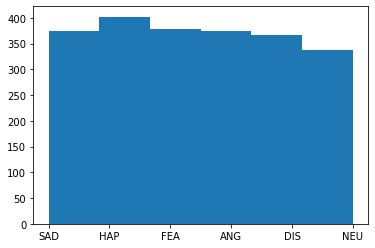

In [87]:
category_test = target[5210:].astype("category")
array = np.array(category_test)
plt.hist(array.flatten(), bins = 6)

In [89]:
fft = librosa.stft(train[0])

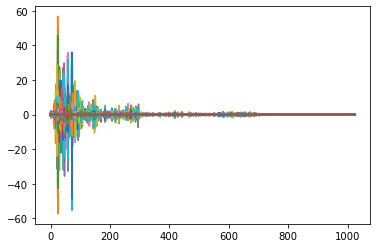

In [91]:
plt.plot(fft)

(1025, 216)

In [ ]:
fft_matrix = []

for i in train:
    temp = librosa.stft